In [1]:
from roboflow import Roboflow
from eduset.fastercnn.fastercnn import Model, VOCDataLoader, VOCDetection
from eduset.fastercnn.fastercnn import get_train_transform, get_valid_transform
from eduset.utils.plots import plot_results
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR

import pandas as pd

import json

In [2]:
# source: https://universe.roboflow.com/jan-zmrzly/eduset-one-dataset/dataset/1

rf = Roboflow(api_key="fcoVgrABNNRobZYGuyhZ")
project = rf.workspace("jan-zmrzly").project("eduset-one-dataset")
dataset = project.version(1).download("voc")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
with open('../eduset/fastercnn/config.json', 'r') as file:
    data = json.load(file)

batch_size = data["config"]["BATCH_SIZE"]
resize_to = data["config"]["RESIZE_TO"]
num_epochs = data["config"]["NUM_EPOCHS"]
num_workers = data["config"]["NUM_WORKERS"]

train_dictionary = data["config"]["TRAIN_DIR"] 
val_dictionary = data["config"]["VAL_DIR"] 

classes = [data["config"]["CLASSES"][str(i)]["name"] for i in range(data["config"]["NUM_CLASSES"])]
classes_vis = data["config"]["CLASSES"]
num_classes = data["config"]["NUM_CLASSES"]

out_dictionary = data["config"]["OUT_DIR"]

In [4]:
train_dataset = VOCDetection(root=train_dictionary,
                             classes=classes,
                             width=resize_to,
                             height=resize_to,
                             transforms=get_train_transform(),
                             name="Train")

val_dataset = VOCDetection(root=val_dictionary,
                           classes=classes, 
                           width=resize_to,
                           height=resize_to,
                           transforms=get_valid_transform(),
                           name="Validation")

print(train_dataset)
print(val_dataset)

Name:		Train
Classes:	['background', 'circle', 'square', 'triangle']
Items:		143

Name:		Validation
Classes:	['background', 'circle', 'square', 'triangle']
Items:		29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


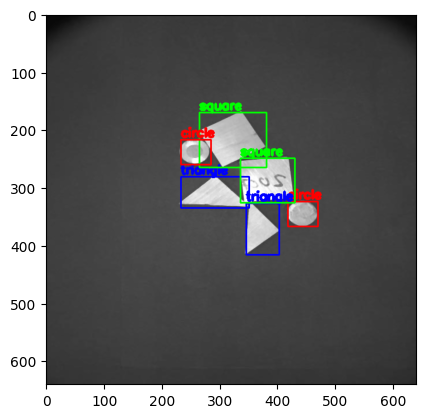

In [5]:
train_dataset.vizualize(idx=100, classes_vis=classes_vis)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


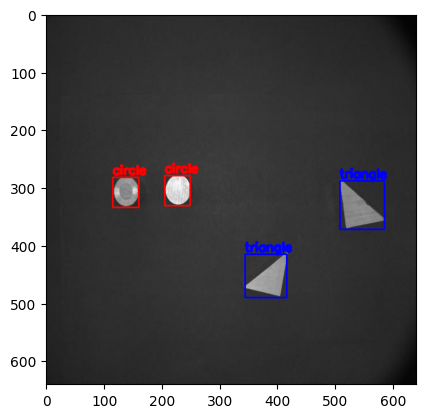

In [6]:
val_dataset.vizualize(idx=10, classes_vis=classes_vis)

In [7]:
train_dataloader = VOCDataLoader(train_dataset, shuffle=True)
val_dataloader = VOCDataLoader(val_dataset)

model = Model(train_dataloader=train_dataloader,
              val_dataloader=val_dataloader,
              epochs=num_epochs,
              out_dir=out_dictionary)
model.create(num_classes=num_classes, size=resize_to)
model.switch_gpu()

Model switched to cuda


In [8]:
optimizer = SGD(params=model.params, 
                lr=0.01,
                momentum=0.9,
                weight_decay=0.0005)

scheduler = StepLR(optimizer=optimizer, 
                   step_size=10, 
                   gamma=0.1)

model.set_optimizer(optimizer)
model.set_scheduler(scheduler)

In [9]:
model.train()



Training


Loss: 0.7851: 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Epoch #1 train loss: 1.068
Epoch #1 mAP: 0.3914708197116852
Epoch #1	Model was saved


Training


Loss: 0.3297: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Epoch #2 train loss: 0.494
Epoch #2 mAP: 0.7500483989715576
Epoch #2	Model was saved


Training


Loss: 0.2332: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch #3 train loss: 0.256
Epoch #3 mAP: 0.7387351989746094


Training


Loss: 0.1541: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch #4 train loss: 0.188
Epoch #4 mAP: 0.796652615070343
Epoch #4	Model was saved


Training


Loss: 0.1569: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch #5 train loss: 0.157
Epoch #5 mAP: 0.8503280878067017
Epoch #5	Model was saved


Training


Loss: 0.1476: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch #6 train loss: 0.146
Epoch #6 mAP: 0.8276329040527344


Training


Loss: 0.1276: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch #7 train loss: 0.137
Epoch #7 mAP: 0.8374017477035522


Training


Loss: 0.1566: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch #8 train loss: 0.126
Epoch #8 mAP: 0.8478260636329651


Training


Loss: 0.0855: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Epoch #9 train loss: 0.116
Epoch #9 mAP: 0.8457973003387451


Training


Loss: 0.0985: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch #10 train loss: 0.111
Epoch #10 mAP: 0.8905248641967773
Epoch #10	Model was saved


Training


Loss: 0.1273: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch #11 train loss: 0.100
Epoch #11 mAP: 0.9033663272857666
Epoch #11	Model was saved


Training


Loss: 0.0930: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Epoch #12 train loss: 0.096
Epoch #12 mAP: 0.9057207107543945
Epoch #12	Model was saved


Training


Loss: 0.0930: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch #13 train loss: 0.099
Epoch #13 mAP: 0.9082410335540771
Epoch #13	Model was saved


Training


Loss: 0.0989: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Epoch #14 train loss: 0.097
Epoch #14 mAP: 0.8771177530288696


Training


Loss: 0.0961: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Epoch #15 train loss: 0.093
Epoch #15 mAP: 0.8918367028236389


Training


Loss: 0.0877: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Epoch #16 train loss: 0.097
Epoch #16 mAP: 0.8865861892700195


Training


Loss: 0.1072: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Epoch #17 train loss: 0.096
Epoch #17 mAP: 0.8925331830978394


Training


Loss: 0.0653: 100%|██████████| 8/8 [00:12<00:00,  1.50s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Epoch #18 train loss: 0.094
Epoch #18 mAP: 0.8856062889099121


Training


Loss: 0.0949: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Epoch #19 train loss: 0.095
Epoch #19 mAP: 0.8880730271339417


Training


Loss: 0.0946: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Epoch #20 train loss: 0.091
Epoch #20 mAP: 0.8879343867301941


Training


Loss: 0.0890: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch #21 train loss: 0.094
Epoch #21 mAP: 0.8974210619926453


Training


Loss: 0.0899: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Epoch #22 train loss: 0.093
Epoch #22 mAP: 0.8839514851570129


Training


Loss: 0.0936: 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch #23 train loss: 0.089
Epoch #23 mAP: 0.8881658315658569


Training


Loss: 0.0991: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Epoch #24 train loss: 0.097
Epoch #24 mAP: 0.8974552154541016


Training


Loss: 0.0892: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch #25 train loss: 0.091
Epoch #25 mAP: 0.8967677354812622


Training


Loss: 0.0979: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Epoch #26 train loss: 0.094
Epoch #26 mAP: 0.8877994418144226


Training


Loss: 0.0997: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Epoch #27 train loss: 0.092
Epoch #27 mAP: 0.8980533480644226


Training


Loss: 0.1028: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch #28 train loss: 0.093
Epoch #28 mAP: 0.9053888320922852


Training


Loss: 0.1172: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Epoch #29 train loss: 0.098
Epoch #29 mAP: 0.8958155512809753


Training


Loss: 0.1039: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Epoch #30 train loss: 0.093
Epoch #30 mAP: 0.8951524496078491


Training


Loss: 0.1061: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch #31 train loss: 0.096
Epoch #31 mAP: 0.9066521525382996


Training


Loss: 0.0880: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Epoch #32 train loss: 0.092
Epoch #32 mAP: 0.9125270843505859
Epoch #32	Model was saved


Training


Loss: 0.1099: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Epoch #33 train loss: 0.094
Epoch #33 mAP: 0.8824037313461304


Training


Loss: 0.0939: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Validating


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Epoch #34 train loss: 0.091
Epoch #34 mAP: 0.8928560018539429


Training


Loss: 0.0744: 100%|██████████| 8/8 [00:17<00:00,  2.22s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Epoch #35 train loss: 0.092
Epoch #35 mAP: 0.8869625329971313


Training


Loss: 0.0852: 100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Epoch #36 train loss: 0.090
Epoch #36 mAP: 0.9038633704185486


Training


Loss: 0.0843: 100%|██████████| 8/8 [00:25<00:00,  3.18s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Epoch #37 train loss: 0.094
Epoch #37 mAP: 0.8792129755020142


Training


Loss: 0.0880: 100%|██████████| 8/8 [00:25<00:00,  3.19s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


Epoch #38 train loss: 0.093
Epoch #38 mAP: 0.8964381217956543


Training


Loss: 0.0941: 100%|██████████| 8/8 [00:25<00:00,  3.21s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Epoch #39 train loss: 0.098
Epoch #39 mAP: 0.9178255200386047
Epoch #39	Model was saved


Training


Loss: 0.0873: 100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


Epoch #40 train loss: 0.092
Epoch #40 mAP: 0.9069966077804565


Training


Loss: 0.0947: 100%|██████████| 8/8 [00:25<00:00,  3.22s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


Epoch #41 train loss: 0.093
Epoch #41 mAP: 0.8905940055847168


Training


Loss: 0.0887: 100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


Epoch #42 train loss: 0.094
Epoch #42 mAP: 0.9016330242156982


Training


Loss: 0.0931: 100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Epoch #43 train loss: 0.094
Epoch #43 mAP: 0.8981879353523254


Training


Loss: 0.0748: 100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


Epoch #44 train loss: 0.093
Epoch #44 mAP: 0.8925178647041321


Training


Loss: 0.0910: 100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


Epoch #45 train loss: 0.090
Epoch #45 mAP: 0.8866930603981018


Training


Loss: 0.1098: 100%|██████████| 8/8 [00:25<00:00,  3.18s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


Epoch #46 train loss: 0.093
Epoch #46 mAP: 0.8871625065803528


Training


Loss: 0.0892: 100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


Epoch #47 train loss: 0.092
Epoch #47 mAP: 0.899798572063446


Training


Loss: 0.0838: 100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Epoch #48 train loss: 0.088
Epoch #48 mAP: 0.9188517332077026
Epoch #48	Model was saved


Training


Loss: 0.1009: 100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Epoch #49 train loss: 0.090
Epoch #49 mAP: 0.8810094594955444


Training


Loss: 0.1009: 100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


Validating


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Epoch #50 train loss: 0.088
Epoch #50 mAP: 0.8928565382957458
Metrics have been saved to ../samples/fastercnn_runs/model


<Figure size 640x480 with 0 Axes>

In [10]:
df = pd.read_csv("../samples/fastercnn_runs/model/results.csv")
df.head()

,epoch,loss score,mAP,mAP@50
0,1,0.785063,0.391471,0.860376
1,2,0.329656,0.750048,1.000000
2,3,0.233200,0.738735,1.000000
3,4,0.154081,0.796653,1.000000
4,5,0.156871,0.850328,1.000000


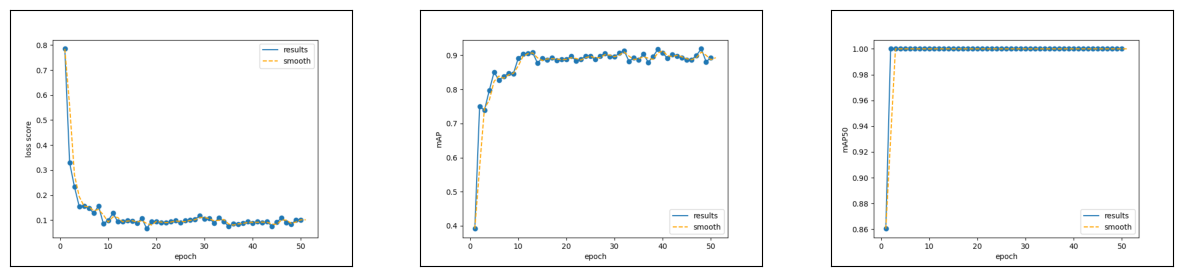

In [11]:
results = [
    "../samples/fastercnn_runs/model/loss score.png",
    "../samples/fastercnn_runs/model/mAP.png",
    "../samples/fastercnn_runs/model/mAP50.png"
]
plot_results(results)